# Pytorch第一个神经网络
本章实现一个简单的前馈神经网络，完成一个二分类任务

网络结构包括输入层、隐藏层和输出层，使用了 `ReLU`激活函数和`Sigmoid`激活函数。

采用了均方根误差损失函数和随机梯度下降优化器。

训练过程是通过前向传播、计算损失、反向传播和参数更新来逐步调整模型参数。

In [3]:
import torch
import torch.nn as nn

# define the size of input layer, hidden layer, and output layer, batch size
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# create imaginary input data and target data
x = torch.randn(batch_size, n_in)            # random generate the input data
y = torch.tensor([[1.0] * batch_size])

# create sequential model
model = nn.Sequential(
    nn.Linear(n_in, n_h),                     # the linear transform input layer to hidden layer
    nn.ReLU(),                                # activation function of hidden layer
    nn.Linear(n_h, n_out),                     # the linear transform of hidden layer to output layer
    nn.Sigmoid()                              # activation function of output layer
)

# define the Mean Squared Error loss function and the optimizer
criterion = torch.nn.MSELoss()                     # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # stochastic gradient descent optimizer

# execute the gradient descent algorithm to train the model
for epoch in range(50):
    # forward pass
    y_pred = model(x)                            # get the predicted value
    loss = criterion(y_pred, y)                  # calculate the loss
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')  # print the loss

    # backward pass
    optimizer.zero_grad()                         # clear the gradients
    loss.backward()                               # backpropagation
    optimizer.step()                              # update the weights


Epoch 1, Loss: 0.2812621295452118
Epoch 2, Loss: 0.2803163528442383
Epoch 3, Loss: 0.27937421202659607
Epoch 4, Loss: 0.2784358561038971
Epoch 5, Loss: 0.2775011956691742
Epoch 6, Loss: 0.27657029032707214
Epoch 7, Loss: 0.2756430208683014
Epoch 8, Loss: 0.2747194766998291
Epoch 9, Loss: 0.2737996578216553
Epoch 10, Loss: 0.27288344502449036
Epoch 11, Loss: 0.2719708979129791
Epoch 12, Loss: 0.2710620164871216
Epoch 13, Loss: 0.2701568305492401
Epoch 14, Loss: 0.2692551612854004
Epoch 15, Loss: 0.26835715770721436
Epoch 16, Loss: 0.26746273040771484
Epoch 17, Loss: 0.2665719985961914
Epoch 18, Loss: 0.26568472385406494
Epoch 19, Loss: 0.26480114459991455
Epoch 20, Loss: 0.26392102241516113
Epoch 21, Loss: 0.2630445063114166
Epoch 22, Loss: 0.2621714770793915
Epoch 23, Loss: 0.26130205392837524
Epoch 24, Loss: 0.260436087846756
Epoch 25, Loss: 0.25957363843917847
Epoch 26, Loss: 0.2587146759033203
Epoch 27, Loss: 0.2578592300415039
Epoch 28, Loss: 0.2570072114467621
Epoch 29, Loss: 0.25

c:\Users\23210\.conda\envs\ml-pytorch\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## 1. 代码解释

### 定义网络参数
```python
n_in, n_h, n_out, batch_size = 10, 5, 1, 10
```

- `n_in`：输入层大小为10，即每个数据点有10个特征；
- `n_h`：隐藏层大小为5，即隐藏层包含5个神经元；
- `n_out`：输出层大小为1，即输出一个二分类结果，（0或1）；
- `batch_size`：每个批次的样本数量为10。

#### 生成输入数据和目标数据
```python
x = torch.randn(batch_size, n_in)
y = torch.tensor([[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])
```

- `x`：随机生成一个大小为`(10, 10)`的输入数据张量，表示10个样本，每个样本有10个特征；
- `y`：目标数据张量，表示每个样本的标签，大小为`(10, 1)`，其中每个元素为0或1，表示二分类任务的标签，是一个 $10\times 1$。

#### 定义神经网络模型
```python
model = nn.Sequential(
    nn.Linear(n_in, n_h), 
    nn.ReLU(),            
    nn.Linear(n_h, n_out),
    nn.Sigmoid()          
)
```

`nn.Sequential`：顺序容器，按顺序将各层组合在一起。
- `nn.Linear(n_in, n_h)`：定义输入层到隐藏层的线性变换，输入特征为`n_in`个，隐藏层有`n_h`个神经元；
- `nn.ReLU()`：在隐藏层后添加ReLU激活函数，增加非线性；
- `nn.Linear(n_h, n_out)`：定义隐藏层到输出层的线性变换，隐藏层有`n_h`个神经元，输出层有`n_out`个神经元；
- `nn.Sigmoid()`：在输出层后添加Sigmoid激活函数，将结果映射到0到1之间，用于二分类任务。

#### 定义损失函数和优化器
```python
criterion = nn.MSELoss()  # 均方根误差损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降优化器
```
- `criterion`：定义损失函数为均方根误差（MSE），用于计算模型输出与目标之间的差异；
- `optimizer`：定义优化器为随机梯度下降（SGD），用于更新模型参数，学习率设置为0.01。

#### 训练模型
```python
for epoch in range(50):
    # forward pass
    y_pred = model(x)                            # get the predicted value
    loss = criterion(y_pred, y)                  # calculate the loss
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')  # print the loss

    # backward pass
    optimizer.zero_grad()                         # clear the gradients
    loss.backward()                               # backpropagation
    optimizer.step()                              # update the weights
```
- `for epoch in range(50)`：训练50个epoch；
- `y_pred = model(x)`：进行前向传播，使用当前模型参数计算输入数据x的预测值y_pred；
- `loss = criterion(y_pred, y)`：计算预测值和目标值y之间的损失；
- `print(f'Epoch {epoch + 1}, Loss: {loss.item()}')`：打印当前epoch的损失；
- `optimizer.zero_grad()`：清除上一步计算所得梯度；
- `loss.backward()`：反向传播，计算损失函数相对于模型参数的梯度；
- `optimizer.step()`：根据计算出的梯度更新模型参数。
- 

Epoch 1, Loss: 0.2560008466243744
Epoch 2, Loss: 0.2557612359523773
Epoch 3, Loss: 0.25552254915237427
Epoch 4, Loss: 0.25528475642204285
Epoch 5, Loss: 0.25504788756370544
Epoch 6, Loss: 0.25481194257736206
Epoch 7, Loss: 0.2545768916606903
Epoch 8, Loss: 0.2543427348136902
Epoch 9, Loss: 0.2541094422340393
Epoch 10, Loss: 0.25387701392173767
Epoch 11, Loss: 0.25364547967910767
Epoch 12, Loss: 0.2534147799015045
Epoch 13, Loss: 0.2531849443912506
Epoch 14, Loss: 0.25295594334602356
Epoch 15, Loss: 0.252727746963501
Epoch 16, Loss: 0.25250041484832764
Epoch 17, Loss: 0.2522738575935364
Epoch 18, Loss: 0.252048134803772
Epoch 19, Loss: 0.2518232464790344
Epoch 20, Loss: 0.25159916281700134
Epoch 21, Loss: 0.25137582421302795
Epoch 22, Loss: 0.25115329027175903
Epoch 23, Loss: 0.2509315311908722
Epoch 24, Loss: 0.25071054697036743
Epoch 25, Loss: 0.25049033761024475
Epoch 26, Loss: 0.2502708435058594
Epoch 27, Loss: 0.25005215406417847
Epoch 28, Loss: 0.24983415007591248
Epoch 29, Loss: 

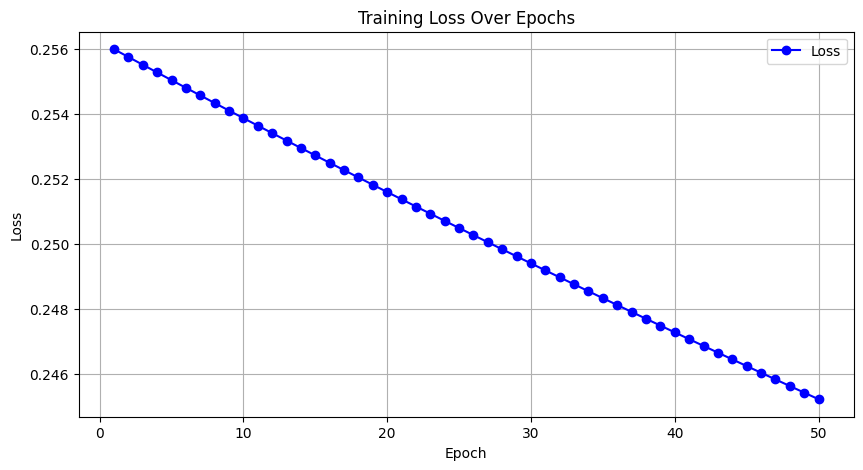

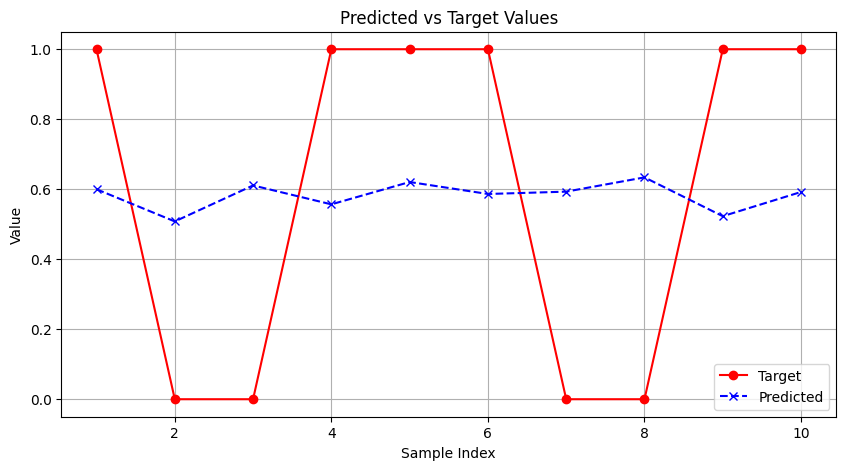

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# create imaginary input data and target data
x = torch.randn(batch_size, n_in)            # random generate the input data
y = torch.tensor([[1.0] * batch_size])

# create sequential model
model = nn.Sequential(
    nn.Linear(n_in, n_h),                     # the linear transform input layer to hidden layer
    nn.ReLU(),                                # activation function of hidden layer
    nn.Linear(n_h, n_out),                     # the linear transform of hidden layer to output layer
    nn.Sigmoid()                              # activation function of output layer
)

# define the Mean Squared Error loss function and the optimizer
criterion = torch.nn.MSELoss()                     # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # stochastic gradient descent optimizer

losses = []  # list to store the loss values for each epoch

# execute the gradient descent algorithm to train the model
for epoch in range(50):
    # forward pass
    y_pred = model(x)                            # get the predicted value
    loss = criterion(y_pred, y)                  # calculate the loss
    losses.append(loss.item())                   # store the loss value
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')  # print the loss

    # backward pass
    optimizer.zero_grad()                         # clear the gradients
    loss.backward()                               # backpropagation
    optimizer.step()                              # update the weights

# plot the loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.grid()
plt.show()

# visualize the loss between predicted values and target values
y_pred_final = model(x).detach().numpy()  # get the final predicted values
y_actual = y.numpy()  # get the target values

plt.figure(figsize=(10, 5))
plt.plot(range(1,batch_size+1), y_actual.T, 'o-', label='Target', color='r')
plt.plot(range(1,batch_size+1), y_pred_final, 'x--', label='Predicted', color='b')
plt.title('Predicted vs Target Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

Epoch 1, Loss: 0.2677444517612457
Epoch 2, Loss: 0.26745519042015076
Epoch 3, Loss: 0.26716697216033936
Epoch 4, Loss: 0.2668796479701996
Epoch 5, Loss: 0.2665933668613434
Epoch 6, Loss: 0.2663079500198364
Epoch 7, Loss: 0.26602351665496826
Epoch 8, Loss: 0.26573997735977173
Epoch 9, Loss: 0.2654574513435364
Epoch 10, Loss: 0.2651757597923279
Epoch 11, Loss: 0.2648950219154358
Epoch 12, Loss: 0.26461514830589294
Epoch 13, Loss: 0.2643362581729889
Epoch 14, Loss: 0.26405826210975647
Epoch 15, Loss: 0.2637811005115509
Epoch 16, Loss: 0.26350492238998413
Epoch 17, Loss: 0.26322951912879944
Epoch 18, Loss: 0.26295509934425354
Epoch 19, Loss: 0.2626814842224121
Epoch 20, Loss: 0.2624087929725647
Epoch 21, Loss: 0.26213696599006653
Epoch 22, Loss: 0.2618659436702728
Epoch 23, Loss: 0.26159578561782837
Epoch 24, Loss: 0.26132652163505554
Epoch 25, Loss: 0.26105815172195435
Epoch 26, Loss: 0.26079052686691284
Epoch 27, Loss: 0.2605237364768982
Epoch 28, Loss: 0.2602578103542328
Epoch 29, Loss:

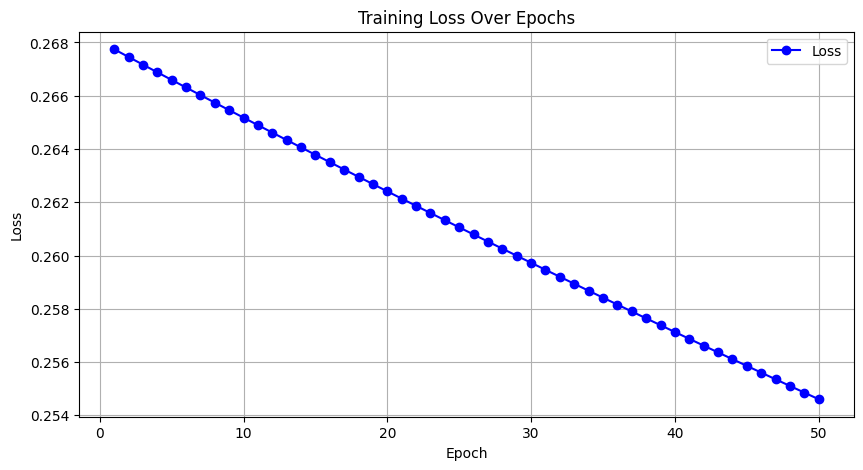

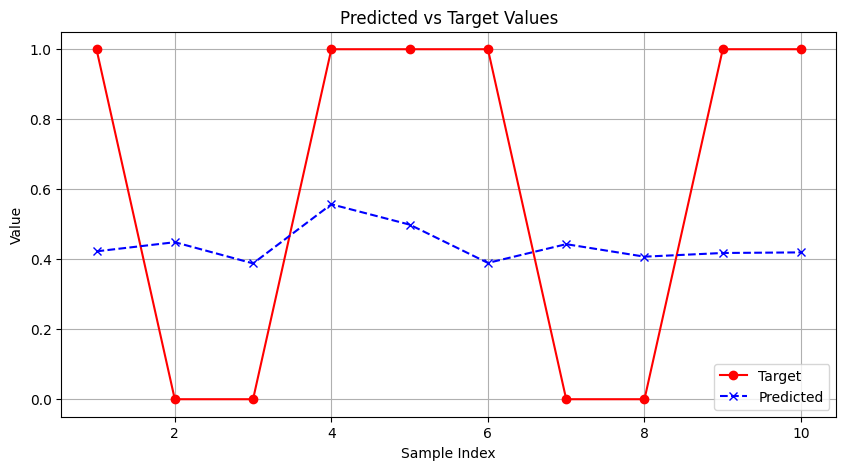

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# create imaginary input data and target data
x = torch.randn(batch_size, n_in)            # random generate the input data
y = torch.tensor([[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])

# create sequential model
model = nn.Sequential(
    nn.Linear(n_in, n_h),                     # the linear transform input layer to hidden layer
    nn.ReLU(),                                # activation function of hidden layer
    nn.Linear(n_h, n_out),                     # the linear transform of hidden layer to output layer
    nn.Sigmoid()                              # activation function of output layer
)

# define the Mean Squared Error loss function and the optimizer
criterion = torch.nn.MSELoss()                     # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # stochastic gradient descent optimizer

losses = []  # list to store the loss values for each epoch

# execute the gradient descent algorithm to train the model
for epoch in range(50):
    # forward pass
    y_pred = model(x)                            # get the predicted value
    loss = criterion(y_pred, y)                  # calculate the loss
    losses.append(loss.item())                   # store the loss value
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')  # print the loss

    # backward pass
    optimizer.zero_grad()                         # clear the gradients
    loss.backward()                               # backpropagation
    optimizer.step()                              # update the weights

# plot the loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.grid()
plt.show()

# visualize the loss between predicted values and target values
y_pred_final = model(x).detach().numpy()  # get the final predicted values
y_actual = y.numpy()  # get the target values

plt.figure(figsize=(10, 5))
plt.plot(range(1,batch_size+1), y_actual, 'o-', label='Target', color='r')
plt.plot(range(1,batch_size+1), y_pred_final, 'x--', label='Predicted', color='b')
plt.title('Predicted vs Target Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# 实例 2
假设有一个二维数据集，目标是根据点的位置将他们分类到两个类别中（如，红色和蓝色点）。

以下实例展示了如何使用神经网络完成简单的二分类任务，为更复杂的任务奠定基础，通过Pytorch的模块化接口，圣经网络的构建，训练和可视化都非常直观。

## 2.1 数据准备
首先生成一些简单的二维数据：

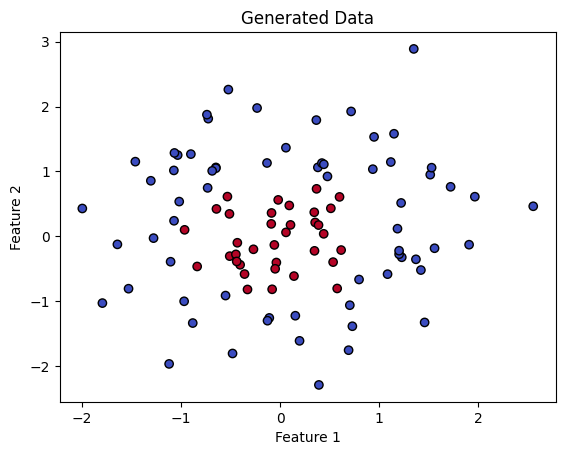

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# generate some random data
n_samples = 100
data = torch.randn(n_samples, 2)           # generate 100 samples of 2D data
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # the dot in the circle is 1, outside is 0

# visualize the data
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolor='k')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.colorbar(label='Label')
plt.show()


## 2.2 定义神经网络
用pytorch创建一个简单的前馈神经网络。

前馈神经网络使用了一层隐藏层，通过简单的线性变换和激活函数捕获数据的非线性模式。

In [14]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # define the layers of the neural network
        self.fc1 = nn.Linear(2, 4)                # input layer has 2 neurons-- 2 parameters, hidden layer has 4 neurons
        self.fc2 = nn.Linear(4, 1)                # hidden layer has 4 neurons, output layer has 1 neuron
        self.sigmoid = nn.Sigmoid()                  # activation function of output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # apply ReLU activation function to the hidden layer
        x = self.sigmoid(self.fc2(x))
        return x
    
# create the model
model = SimpleNN()

## 2.3 定义损失函数和优化器

In [15]:
# define the loss function and optimizer of the model
criterion = nn.BCELoss()                     # binary cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # stochastic gradient descent optimizer

## 2.4 训练模型
用数据训练模型，使其学会分类


In [16]:
epochs = 100
for epoch in range(epochs):
    outputs = model(data)                     # forward pass
    loss = criterion(outputs, labels)         # calculate the loss

    optimizer.zero_grad()                     # clear the gradients
    loss.backward()                           # backpropagation
    optimizer.step()                          # update the weights

    if (epoch + 1) % 10 == 0:                 # print the loss every 10 epochs
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6922
Epoch [20/100], Loss: 0.6882
Epoch [30/100], Loss: 0.6843
Epoch [40/100], Loss: 0.6806
Epoch [50/100], Loss: 0.6771
Epoch [60/100], Loss: 0.6737
Epoch [70/100], Loss: 0.6705
Epoch [80/100], Loss: 0.6675
Epoch [90/100], Loss: 0.6645
Epoch [100/100], Loss: 0.6617


## 2.5 测试模型并可视化结果


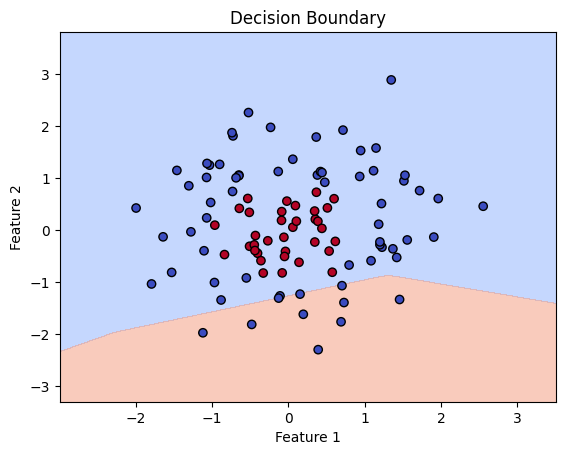

In [17]:
# visualize the decision boundary
def plot_decision_boundary(model,data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)  # create a grid of points
    predictions = model(grid).detach().numpy().reshape(xx.shape)  # get the predictions for the grid points
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], alpha=0.5, cmap='coolwarm')  # plot the decision boundary
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolor='k')  # plot the data points
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(model, data)  # plot the decision boundary